In [38]:
#Import warnings library to filter warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd

#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Data Clustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
#Read Country Dataset
missing_values = ["n/a", "na", "--","NA","NaN"]
country_df = pd.read_csv('Country-data.csv', encoding='iso-8859-1',na_values=missing_values)

In [4]:
#Lets check sample records
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
#Lets now see basic information of dataset 
country_df.shape

(167, 10)

In [ ]:
#There are 10 feature variables and 167 records in our dataset

In [6]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [ ]:
#I see that all the columns are imported with corrcet datatype

In [7]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Insights - Looks like each and every column of our dataset has outliers.

In [8]:
#Lets now list down numerical and categorical features in our dataset

num_dtype=['float64','float32','int64','int32']
numeric_features = list(country_df.select_dtypes(num_dtype).columns.values)
categorical_features = list(country_df.select_dtypes("object").columns.values)
print("Numerical Features in our dataset are: ",numeric_features)
print("Categorical Features in our dataset are: ",categorical_features)

Numerical Features in our dataset are:  ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
Categorical Features in our dataset are:  ['country']


In [9]:
#Lets check for missing values now
#I have created a method to check total count and percentage of missing values in a dataset
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (100 *(data.isnull().sum()/len(data))).sort_values(ascending=False)
    return pd.concat([total,percent], axis=1, keys=['Total','Percent'])

In [10]:
missing_data(country_df)

,Total,Percent
gdpp,0,0.0
total_fer,0,0.0
life_expec,0,0.0
inflation,0,0.0
income,0,0.0
imports,0,0.0
health,0,0.0
exports,0,0.0
child_mort,0,0.0
country,0,0.0


Insights - I see no missing values in our dataset.

In [11]:
#Lets now check for duplicate records
country_df[country_df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


Insights - There are no duplicate records present in our dataset

# Data Preparation

In [12]:
#After looking at data-dictionary, I came to know that fields - exports, health and imports 
#are actually given as percentage of total GDP. 
#As GDP is different for each country, we can not compare countries on the basis of %age. 
#But we have have GDPP information and not GDP inofrmation
#After doing some research I found that GDPP is nothing but a way of measuring GDP. So I am calculating actual values of 
#exports, imports and health as a %age of this field.

country_df['exports'] = (country_df['exports']*country_df['gdpp'])/100
country_df['imports'] = (country_df['imports']*country_df['gdpp'])/100
country_df['health'] = (country_df['health']*country_df['gdpp'])/100
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [13]:
country_df.describe() #Now lets describe the dataset

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Insights - After inspecting closely, I see that there are outliers in the dataset as for almost each field, data values varies a lot in each quarter.

In [14]:
#Lets now check if there is any duplicate value of country
print(len(country_df['country'].unique()))

167


Insights: As sum of unique countries is equal to total number of records in our dataset, I can say that there are no multiple records corresponding to a country.

# Outlier Detection:

In [15]:
#Lets create a method to see distribution of our various feature variables
def check_distribution(col, data):
    plt.figure(figsize=(20,7))
    plt.subplot(121)
    skewness = str(round(data[col].skew(),2))
    sns.distplot(a=data[col])
    plt.title('Distribution of '+col, fontsize=16)
    plt.subplot(122)
    sns.boxplot(y=data[col])
    plt.title('Detection of Outliers for '+col, fontsize=16)
    print('Skewness: ',skewness) 
    print('Kurtosis: ',round(data[col].kurt(),2))
    plt.show()

Skewness:  1.45
Kurtosis:  1.77


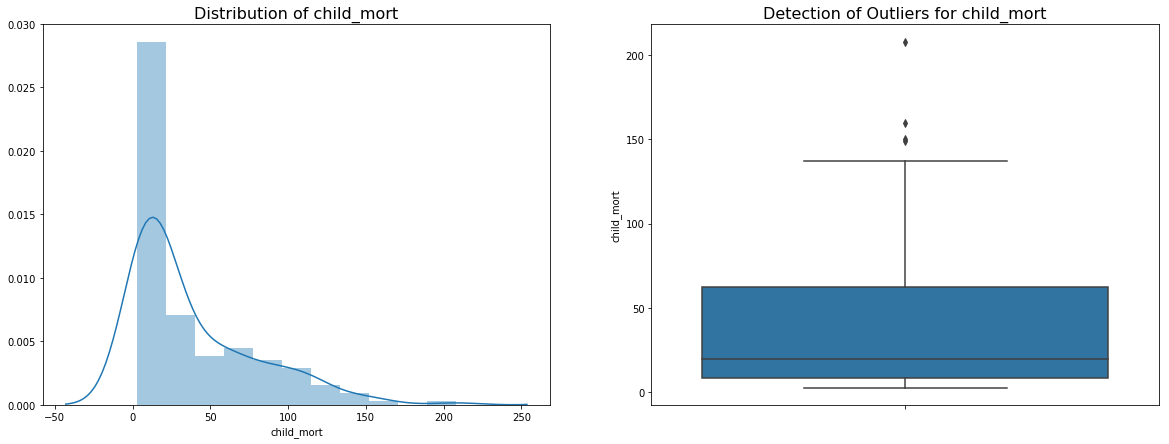

In [16]:
check_distribution('child_mort',country_df)

Insights - I see that data is highly skewed as is cleared by seeing skewness value of 1.45.

Also, as Kurtosis < 3 shows that dataset has lighter tails than normal distribution.

Skewness:  6.72
Kurtosis:  58.69


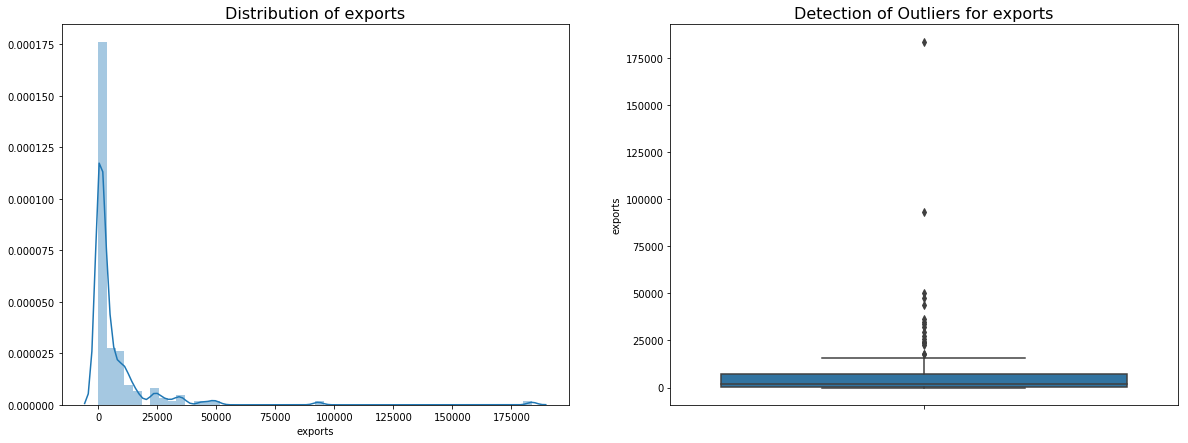

In [17]:
check_distribution('exports',country_df)

Insights - I see that data is highly skewed as is cleared by seeing skewness value of 6.72

Skewness:  2.53
Kurtosis:  6.23


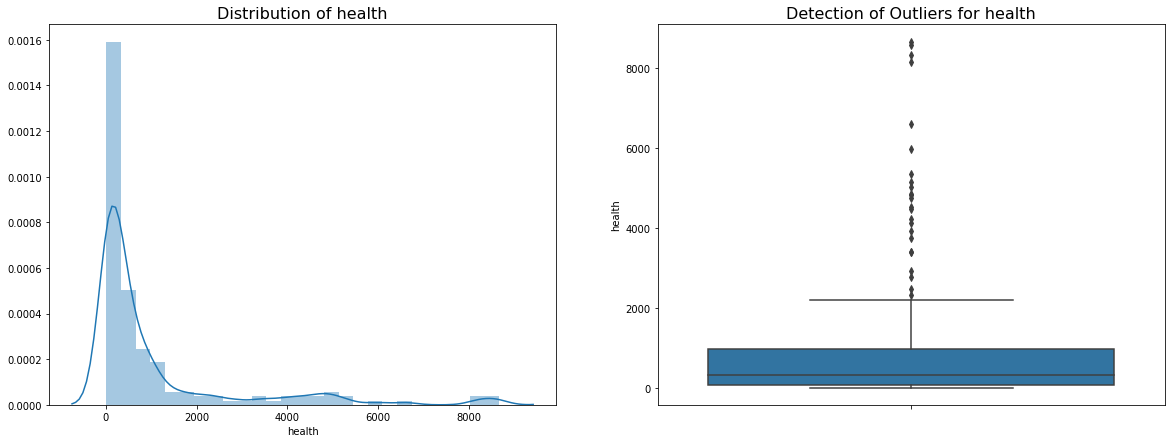

In [18]:
check_distribution('health',country_df)

In [ ]:
#Here also, data is highly skewed for health column.

Skewness:  6.62
Kurtosis:  56.7


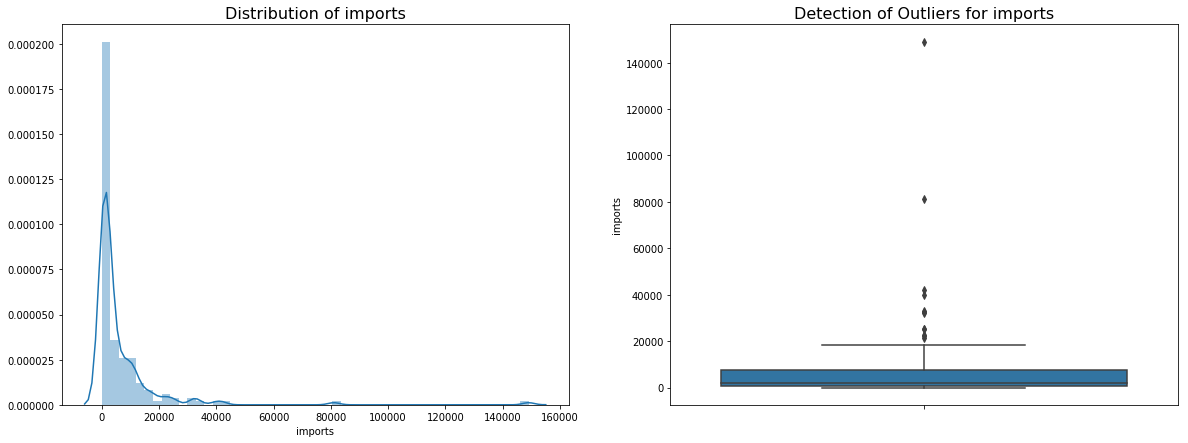

In [19]:
check_distribution('imports',country_df)

In [ ]:
#Insights - Like exports, dataset contains so many outlier values for import column.

Skewness:  2.23
Kurtosis:  7.03


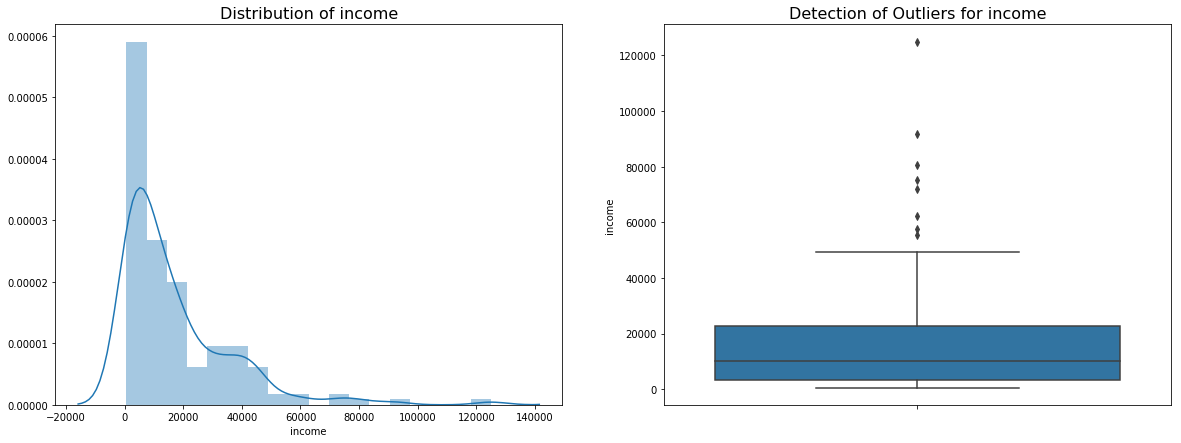

In [20]:
check_distribution('income',country_df)

In [ ]:
#Insights - Clearly, dataset contains outliers. Skewness value is: 2.23 and kurt value is: 7.03

Skewness:  -0.97
Kurtosis:  1.15


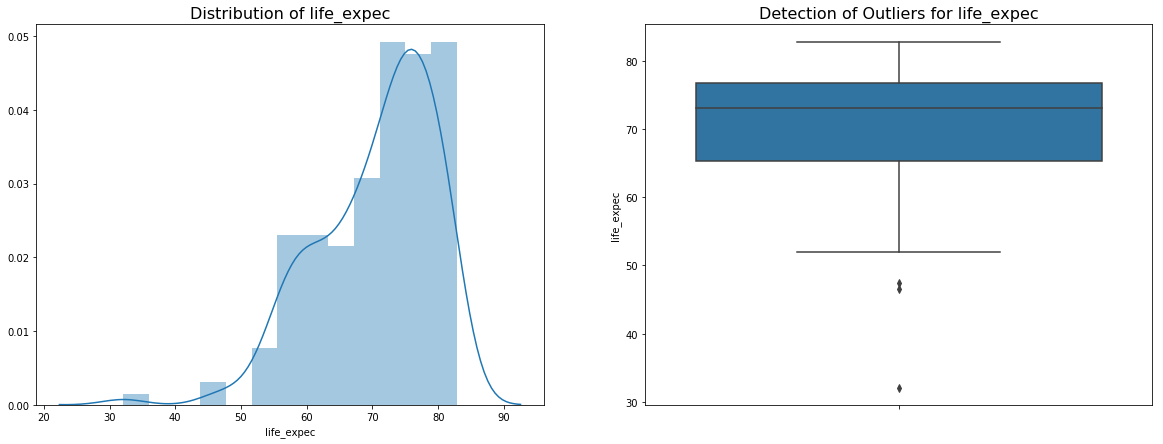

In [21]:
check_distribution('life_expec',country_df)

In [22]:
#I see that skew value is negative and close to -1, that shows that dataset contains outliers on lower values 
#and is moderately skewed. 
#Which is clearly visible by plots.

Skewness:  0.97
Kurtosis:  -0.19


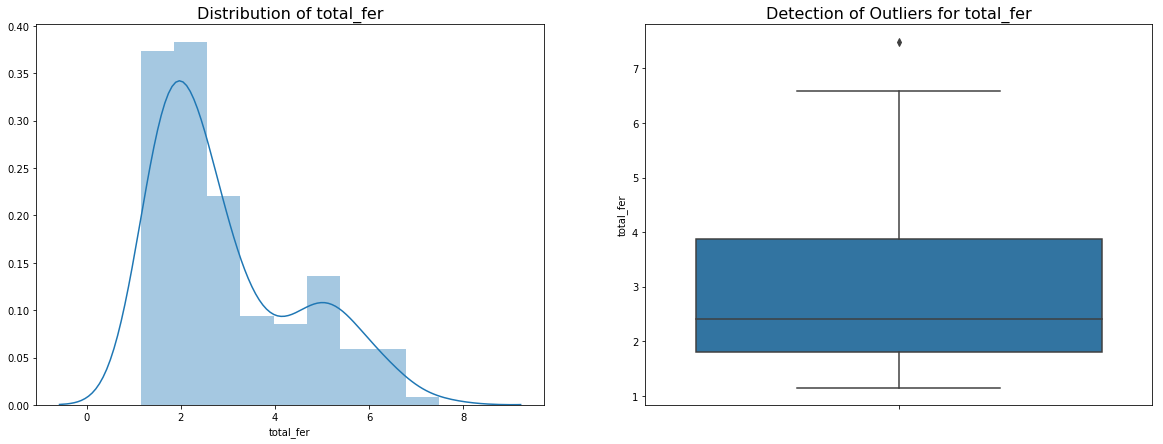

In [23]:
check_distribution('total_fer',country_df)

In [ ]:
#Insights - Our plots shows that dataset contains some outliers and are on higher end side.
#Skew value is: 0.97 and Kurt value is: -0.19

Skewness:  2.22
Kurtosis:  5.53


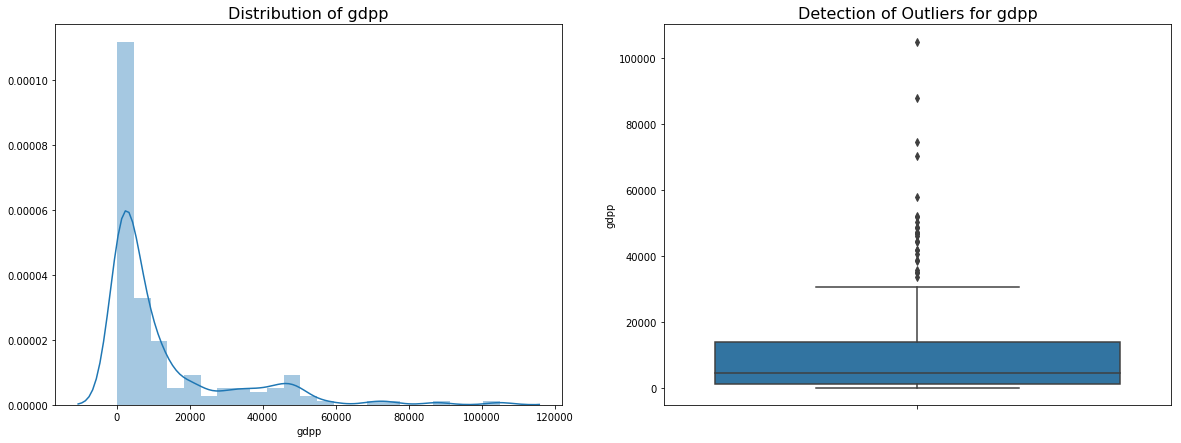

In [24]:
check_distribution('gdpp',country_df)

In [ ]:
#Insights - Here also I see that 'GDPP' column in our dataset contains outliers.

Skewness:  5.15
Kurtosis:  41.74


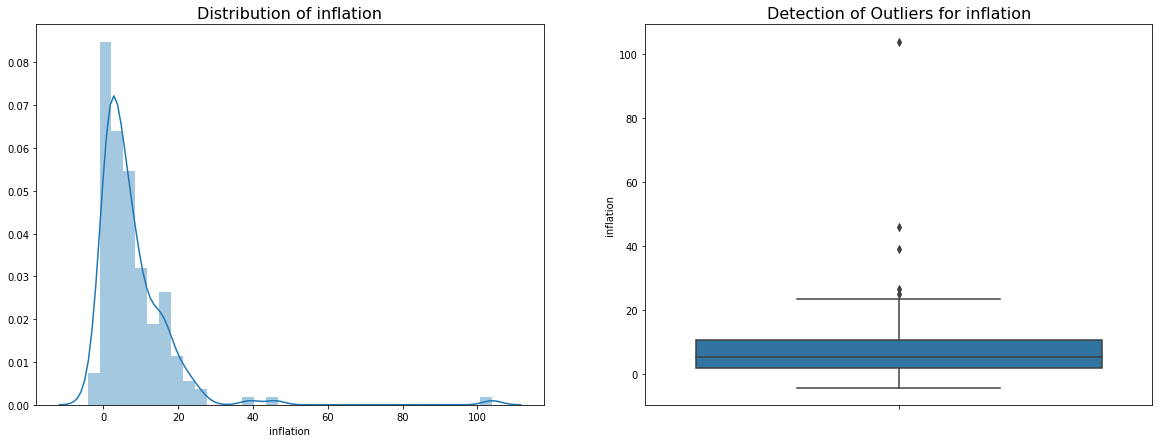

In [25]:
check_distribution('inflation',country_df)

In [ ]:
#Looks like some of the countries has much higher growth rate than other countries and thus act as an outlier in our dataset.

Insights - As we need to analyze countries which are in dire need of help, so they may be countries  where child_mort is highest or income is lowest or GDPP is lowest which may also act as outliers.

Business Aspect: I understand that these outliers are either because of extreme poor condition of a country or extreme good condition of a country. And we dont want to loose on first type of countries. so we can not do outlier treatment at this point of time.

# Data Visualization

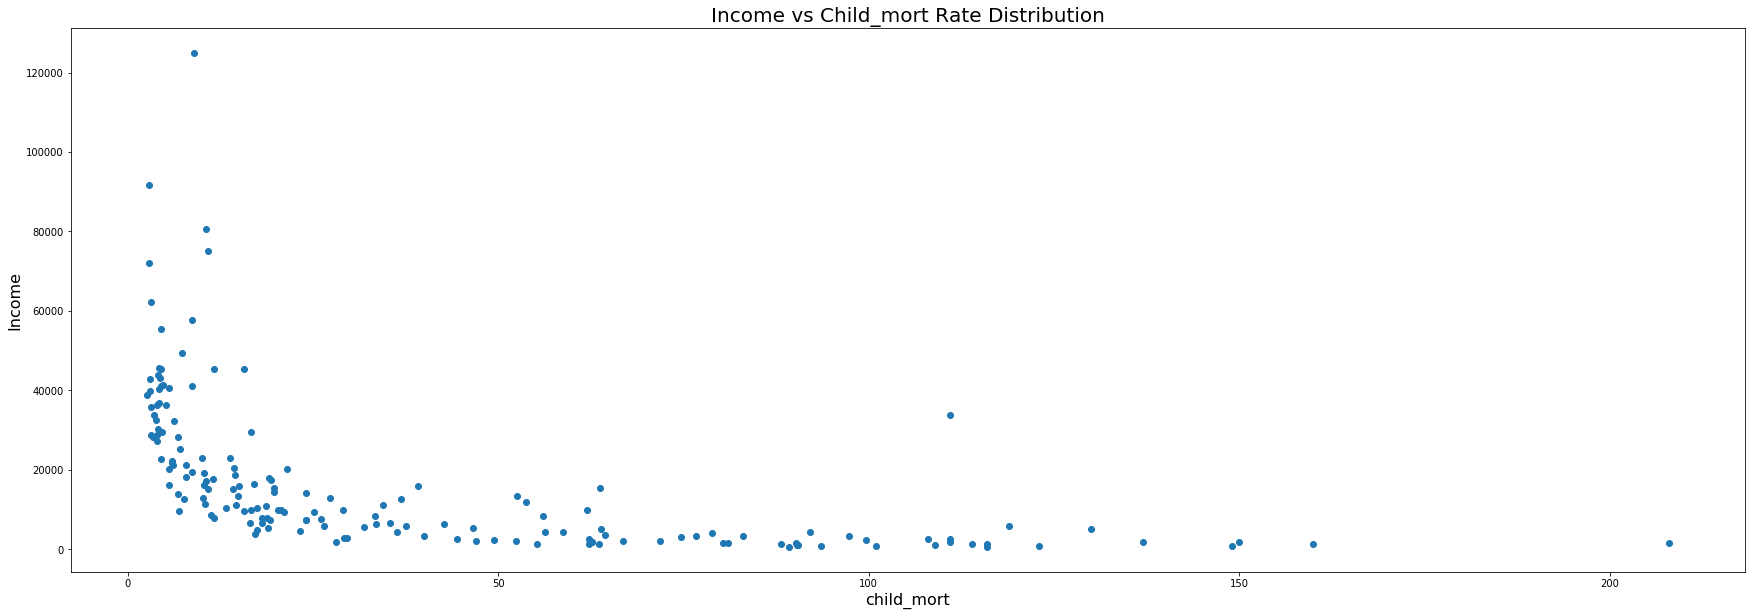

In [29]:
#Lets now plot child_mort and income
plt.figure(figsize=(30,10))
plt.scatter(y='income',x='child_mort',data=country_df) 
plt.xlabel("child_mort", fontsize=16)
plt.ylabel("Income", fontsize=16)
plt.title("Income vs Child_mort Rate Distribution", fontsize=20)
plt.show()

# Insights - 
Child_mort rate is considerably high if income of that country is low which is also acting as an outlier. 
Same we had predicted during outlier detection.
Also, I see 1 country where income is almost 4000 but child_mort rate is much higher than the countries with same income range.

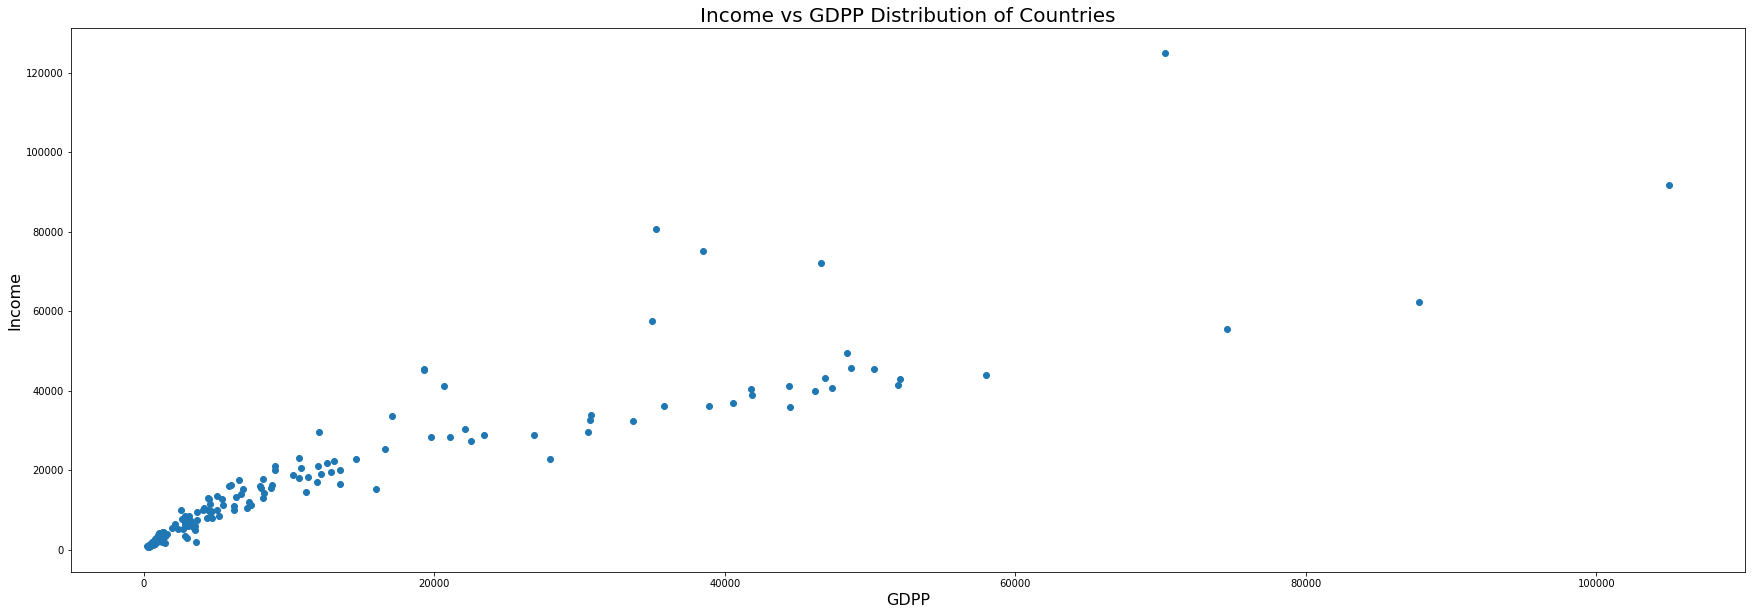

In [31]:
plt.figure(figsize=(30,10))
plt.scatter(y='income',x='gdpp',data=country_df)  
plt.xlabel("GDPP", fontsize=16)
plt.ylabel("Income", fontsize=16)
plt.title("Income vs GDPP Distribution of Countries", fontsize=20)
plt.show()

Insights - GDPP of a country is low if income is low and vice-versa which actually makes sense.

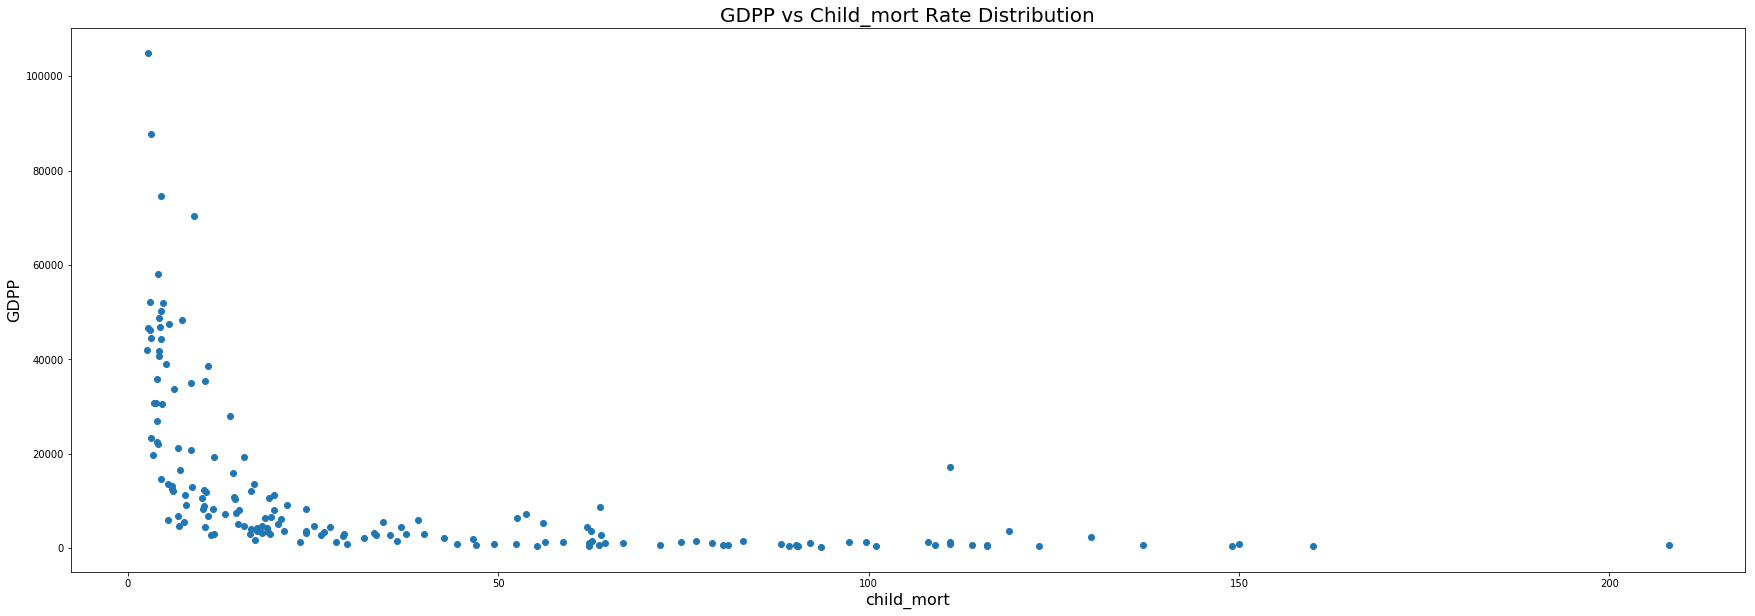

In [32]:
plt.figure(figsize=(30,10))
plt.scatter(y='gdpp',x='child_mort',data=country_df)  
plt.xlabel("child_mort", fontsize=16)
plt.ylabel("GDPP", fontsize=16)
plt.title("GDPP vs Child_mort Rate Distribution", fontsize=20)
plt.show()

Insights - I see that countries where GDPP is low, there child_mort rate is high. This is because income and GDPP of a country are corrleated as we saw from last plot.

# Multi-Collinearity Detection

In [ ]:
#Lets now check if there is multicollinearity present in our dataset

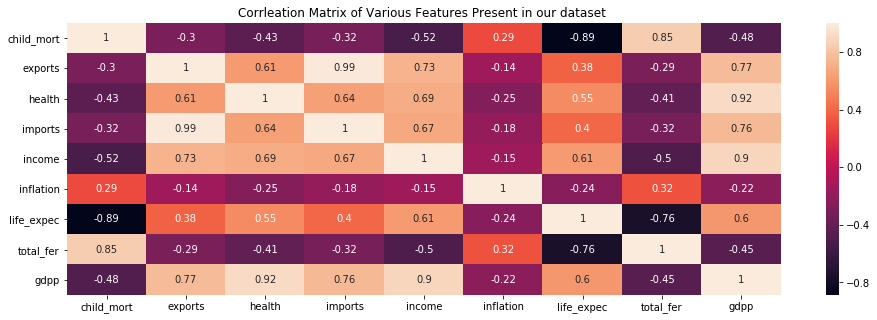

In [34]:
plt.figure(figsize=(16,5))
sns.heatmap(country_df.corr(), annot=True)
plt.title("Corrleation Matrix of Various Features Present in our dataset ")
plt.show()

Insights - From above heatmap, I see that income is highly correlated with all features other than inflation and total_fer
but total_fer is highly correlated with child_mort and inflation is nothing but annual growth rate of total GDP which can be calculated by GDPP.
So, my main focus of analysis will be on these 3 fields - child_mort, income and GDPP.

Overall, I see that there are 10 feature variable available which are highly correlated to each other,
but dropping these variables will lead to information loss. So I will apply PCA to reduce dimensions.


In [35]:
country_df.shape

(167, 10)

# Feature Scaling

In [36]:
bkp_country_df = country_df.copy() #Create a backup of original dataset
#Now, first we need to seperate out numerical and categorical features as PCA works only with Numeric features.
Y_country = bkp_country_df.pop('country')
X_country = bkp_country_df.copy()
X_country.shape

(167, 9)

In [39]:
#Before proceeding with PCA, we need to scale our variables.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_country = scaler.fit_transform(X_country)
X_country=pd.DataFrame(X_country, columns=bkp_country_df.columns)
X_country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [40]:
X_country.shape

(167, 9)

# Dimensionality Reduction - PCA

In [43]:
pca= PCA(svd_solver='randomized', random_state=42)
pca.fit(X_country)
pca.components_  #Find out Eigen Vectors

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [44]:
#Lets see explained variance by each PC
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

In [45]:
#Check Cumulative Explained variance ratio
cumu_var = np.cumsum(pca.explained_variance_ratio_)
print(cumu_var)

[0.58937298 0.77382467 0.87293939 0.93366217 0.96395389 0.98855216
 0.9979496  0.99950602 1.        ]


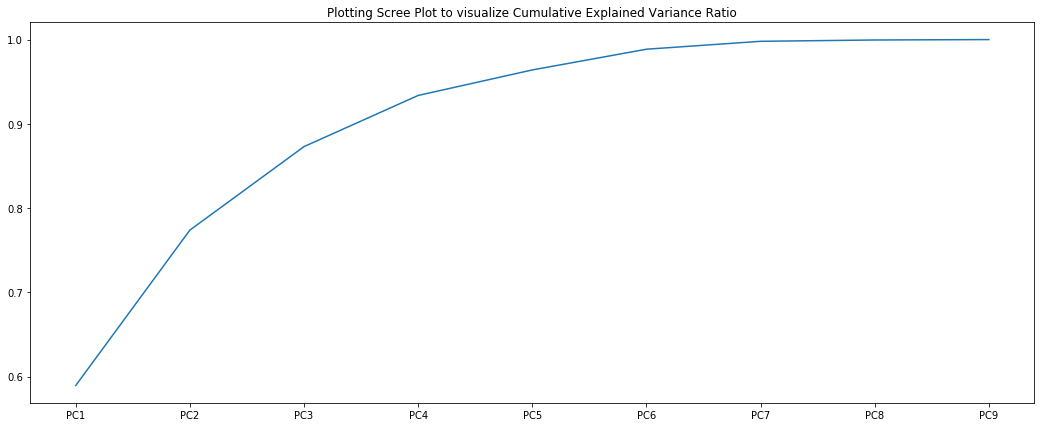

In [47]:
#Scree plot
plt.figure(figsize=(18,7))
plt.plot(cumu_var)
plt.title("Plotting Scree Plot to visualize Cumulative Explained Variance Ratio")
plt.xticks(np.arange(9), ('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8','PC9'))
plt.show()

Insights - I see that almost 87%  of the variance is explained by 3 principle components. 
But also, 4 PCs can explian 93% of variance.
Now to decide on optimal number of PCs to be taken, lets see eigen values

In [53]:
#Lets check for Eigen Values now
pca.explained_variance_

array([5.33631081e+00, 1.67006556e+00, 8.97406142e-01, 5.49797220e-01,
       2.74267850e-01, 2.22718073e-01, 8.50864327e-02, 1.40921616e-02,
       4.47261467e-03])

I see that PC1 and PC2 have eigen values greater than 1, PC3 has eigen value almost equal to 1 but PC4 has Eigen value as 0.5 which is less than 1
which means this PC doesn't have much of a variation. So PC1, PC2 and PC3 are optimal principal components for our dataset.

In [54]:
#Create a new dataframe with our original feature variables and our Principle Components
pca_df = pd.DataFrame({'Feature': bkp_country_df.columns, 'PC1': pca.components_[0], 'PC2': pca.components_[1],'PC3': pca.components_[2]})
pca_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


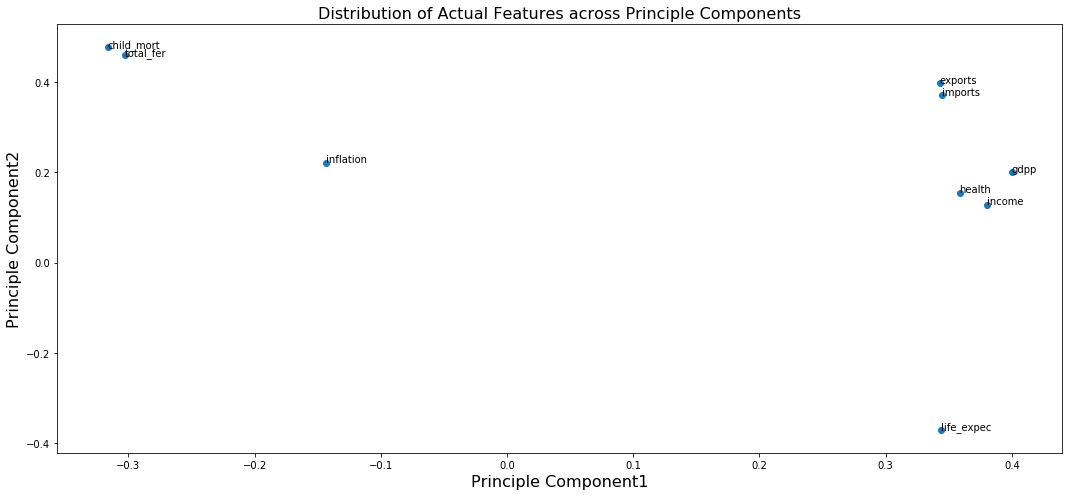

In [55]:
#As 77% of variance is explained by PC1 and PC2, so lets visualise our feature variables with first 2 PCs
plt.figure(figsize=(15,7))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel("Principle Component1", fontsize=16)
plt.ylabel("Principle Component2", fontsize=16)
plt.title("Distribution of Actual Features across Principle Components", fontsize=16)
for i,txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

In [ ]:
#I see that all of the feature variables are nicely explained by principle components - Child_mort and total_fer are explained by PC2 
#and income, GDPP, health, life_expec, imports, exports are expalained by PC1.
#And inflation is explaiend by combination of PC1 and PC2.

In [73]:
#Lets now transform our dataset based on these principle components using IncrementalPCA
from sklearn.decomposition import IncrementalPCA
final_pca = IncrementalPCA(n_components=3)
X_PCA = final_pca.fit_transform(X_country)
X_PCA.shape

(167, 3)

In [74]:
X_PCA_df = pd.DataFrame(X_PCA, columns =['PC1','PC2','PC3'])
X_PCA_df.shape #Lets again check shape of our dataframe

(167, 3)

In [75]:
X_PCA_df.head() #lets check sample records with our principle components

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


# Multicollinearity Detection using PCs

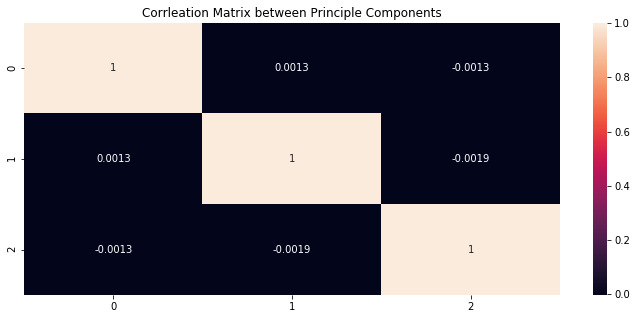

In [97]:
#Lets check corrleation between our PCs
corrmat = np.corrcoef(X_PCA.transpose()) 
plt.figure(figsize=(12,5))
plt.title("Corrleation Matrix between Principle Components")
sns.heatmap(corrmat, annot=True)
plt.show()

Insights - I see that corrleation coefficient betwene PCs are almost equal to 0.

In [98]:
#Lets now concat country names with principle components
final_PCA_df = pd.concat([Y_country, X_PCA_df],axis=1) 
final_PCA_df.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


# Outlier Detection after PCA


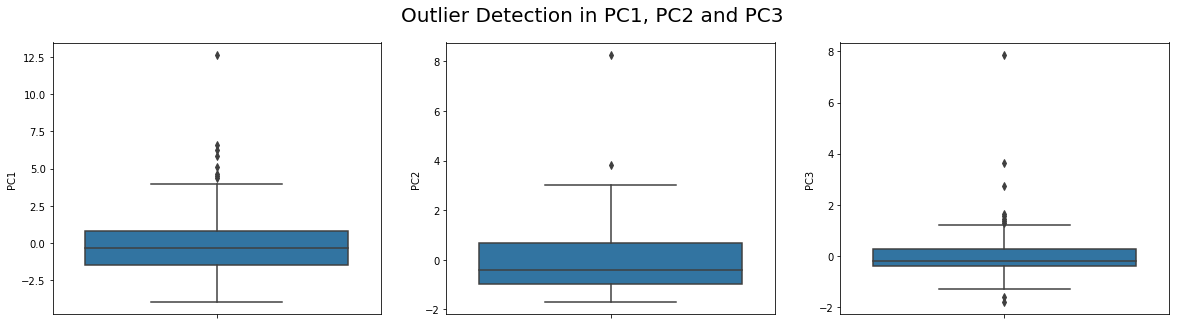

In [99]:
plt.figure(figsize=(20,5))
plt.suptitle("Outlier Detection in PC1, PC2 and PC3", fontsize=20)
plt.subplot(131)
sns.boxplot(y=final_PCA_df['PC1'])
plt.subplot(132)
sns.boxplot(y=final_PCA_df['PC2'])
plt.subplot(133)
sns.boxplot(y=final_PCA_df['PC3'])
plt.show()

In [ ]:
#I see that dataset still contains outliers. As for using KMeans algorithm, dataset should be free of outliers 
#otherwise it may impact our choice of centroids and hence the clusters.
#So lets drop these outliers for now and later we can include them.

# Outliers Treatment

In [159]:
#I am checking quantile values of original dataset from original dataset 
#rather than from dataset created after dropping outliers of previous PC
#so that number of records will not be impacted much and with that outliers will also be removed.

Q1_PC1 = final_PCA_df['PC1'].quantile(0.05)
Q3_PC1 = final_PCA_df['PC1'].quantile(0.95)
df_outliers_remd = final_PCA_df[(final_PCA_df['PC1'] >=Q1_PC1) & (final_PCA_df['PC1'] <=Q3_PC1)]
Q1_PC2 = final_PCA_df['PC2'].quantile(0.05) 
Q3_PC2 = final_PCA_df['PC2'].quantile(0.95)
df_outliers_remd = df_outliers_remd[(df_outliers_remd['PC2']>=Q1_PC2) & (df_outliers_remd['PC2']<=Q3_PC2)]
Q1_PC3 = final_PCA_df['PC3'].quantile(0.05)
Q3_PC3 = final_PCA_df['PC3'].quantile(0.95)
df_outliers_remd = df_outliers_remd[(df_outliers_remd['PC3']>=Q1_PC3) & (df_outliers_remd['PC3']<=Q3_PC3)]
df_outliers_remd.shape #Lets now check shape of the dataset

(125, 4)

Insight - I see that 42 records are dropped in outliers treatment. We are now left with only 125 records.

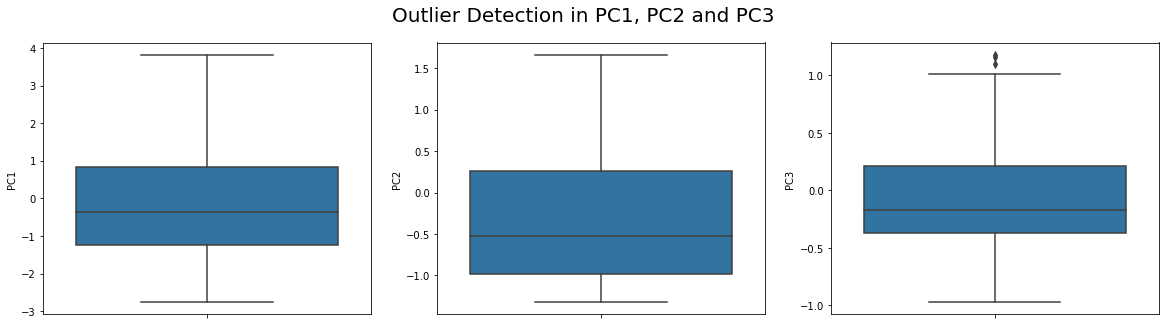

In [151]:
plt.figure(figsize=(20,5))
plt.suptitle("Outlier Detection in PC1, PC2 and PC3", fontsize=20)
plt.subplot(131)
sns.boxplot(y=df_outliers_remd['PC1'])
plt.subplot(132)
sns.boxplot(y=df_outliers_remd['PC2'])
plt.subplot(133)
sns.boxplot(y=df_outliers_remd['PC3'])
plt.show()

Insights - I see that there are no outliers in PC1 and PC2 but PC3 has a very small number of outliers.Lets keep them for now and proceed for clustering.

# Visualizing the points on the PCs

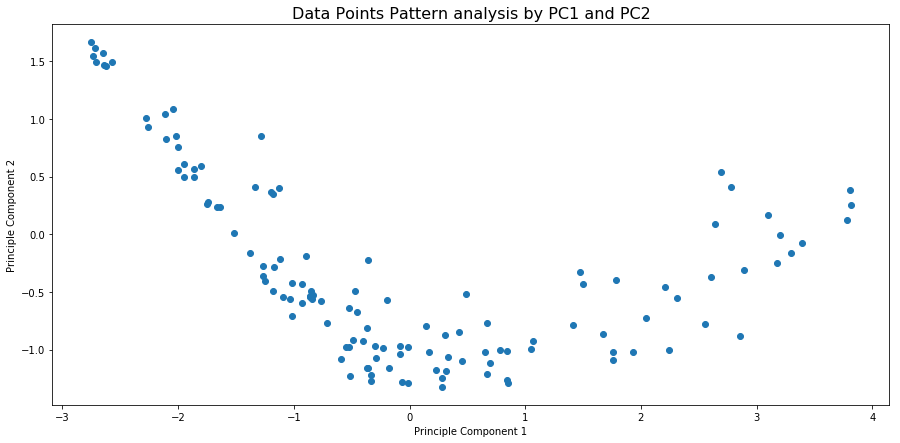

In [152]:
#Lets first plot PC1 and PC2
plt.figure(figsize=(15,7))
plt.scatter(df_outliers_remd['PC1'], df_outliers_remd['PC2'])
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Data Points Pattern analysis by PC1 and PC2", fontsize=16)
plt.show()

Insights - I can visualize some cluster formation in above plot.

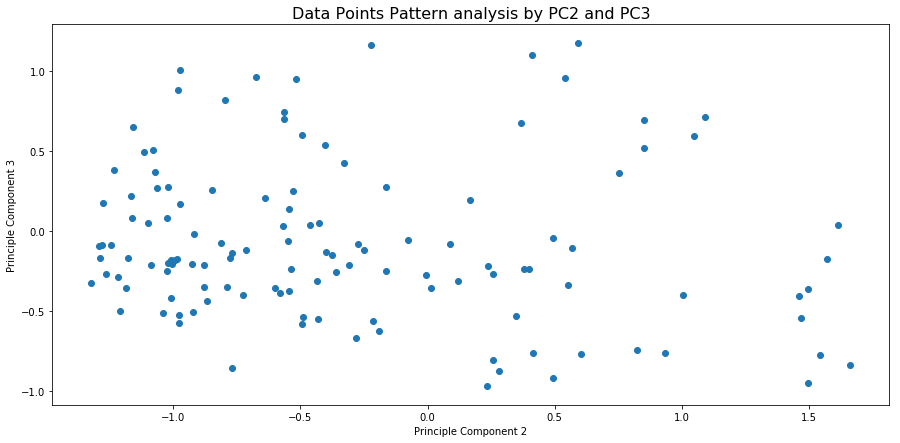

In [153]:
#Similarly, lets now visualize PC2 and PC3
plt.figure(figsize=(15,7))
plt.scatter(df_outliers_remd['PC2'], df_outliers_remd['PC3'])
plt.xlabel("Principle Component 2")
plt.ylabel("Principle Component 3")
plt.title("Data Points Pattern analysis by PC2 and PC3", fontsize=16)
plt.show()

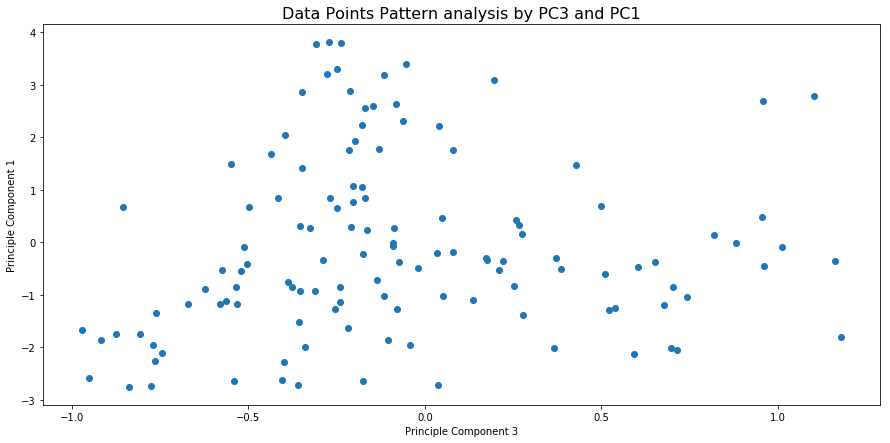

In [156]:
#Similarly, lets now visualize PC1 and PC3
plt.figure(figsize=(15,7))
plt.scatter(df_outliers_remd['PC3'], df_outliers_remd['PC1'])
plt.xlabel("Principle Component 3")
plt.ylabel("Principle Component 1")
plt.title("Data Points Pattern analysis by PC3 and PC1", fontsize=16)
plt.show()

In [ ]:
#Insights- Here also, I can see some clusters being formed up between our data points.
#So, lets go ahead and begin clustering process.

# Clustering

In [157]:
#Check if data set is suitable for clustering using Hopkins statistics


from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #print(d)
    #d = len(vars) # columns
    n = len(X) # rows
   # print(n)
    m = int(0.1 * n) 
    #print(m)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    #print(nbrs)
    rand_X = sample(range(0, n, 1), m)
    #print(rand_X)
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        
        wjd.append(w_dist[0][1])
    
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [160]:
hopkins(df_outliers_remd[['PC1','PC2','PC3']])

0.8241970909265248

In [ ]:
#If H> 0.5 then that means that dataset is suitable for clustering. 
#In our case, H=0.82 that means we are good to go to create clusters

In [161]:
#Now, I will create 2 dataframes which are copy of our df_outliers_remd df. Out of them we will use 1 for KMeans clustering and
#1 for Hierarchical Clustering
df_kmeans = df_outliers_remd.copy()
df_hierarchical = df_outliers_remd.copy()

In [162]:
#Now as Kmeans can deal only with numeric features, so lets seperate out numeric and categorical features
y = df_outliers_remd.pop('country')
X=df_outliers_remd.copy()

In [ ]:
#Lets first see how many clusters are idle to represent our dataset. This can be checked using Elbow curve and Silhouette score

# Finding Optimal Number of Clusters

I see that there is a bend in the above curve on k=3 and k=5. 

Lets now check what k we get from silhouette score

In [363]:
#Silhouette Analysis
from sklearn.metrics import silhouette_score
sse=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append([k, silhouette_score(X, kmeans.labels_)])

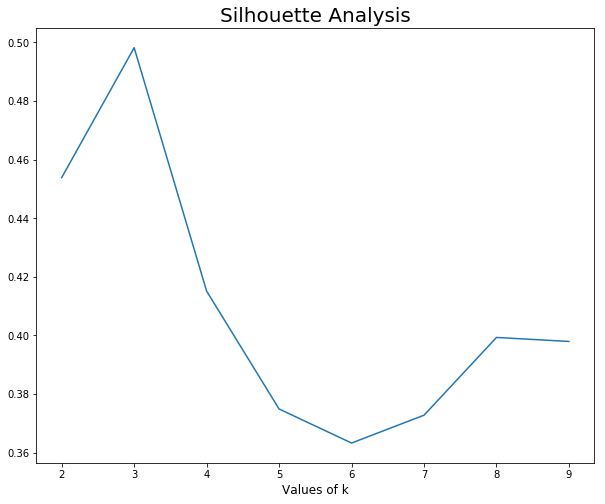

In [364]:
fig = plt.figure(figsize = (10,8))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1])
plt.title("Silhouette Analysis", fontsize=20)
plt.xlabel("Values of k", fontsize=12)
plt.show()

Silhouette score tells us about inter cluster distance. I see that distance is maximum at k=3. 

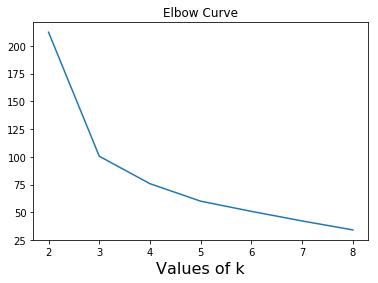

In [359]:
#Plot Elbow Curve
ssd =[]
n_clusters = [2,3,4,5,6,7,8]
for cluster in n_clusters:
    kmeans = KMeans(cluster, max_iter=300,init='k-means++', random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.xticks(np.arange(7),n_clusters)
plt.xlabel("Values of k", fontsize=16)
plt.title("Elbow Curve")
plt.show()


I see that by both the methods, Number of clusers-3 or 5 are suitable - as we have maximum inter cluter distance.
Lets first create 3 clusters and see what we get out of it.

In [169]:
kmeans = KMeans(n_clusters=3, init= 'k-means++', max_iter=300, random_state=42)
kmeans.fit(X)
kmeans.labels_

array([2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1,
       1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1,
       1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 2, 2,
       1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2])

In [171]:
df_kmeans['ClusterID'] = kmeans.labels_
df_kmeans.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,2
2,Algeria,-0.457626,-0.673301,0.961867,1
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103,1
6,Armenia,-0.332692,-1.274517,0.176636,1
7,Australia,3.180362,-0.250785,-0.116877,0


In [173]:
#Lets see how mamy records have gone to each cluster. For a cluster to be a good cluster, atleast 5% of a dataset should 
#be there in each cluster.
df_kmeans['ClusterID'].value_counts()


1    66
2    32
0    27
Name: ClusterID, dtype: int64

In [174]:
#I see that each cluster has atleast 5% data points of our dataset.

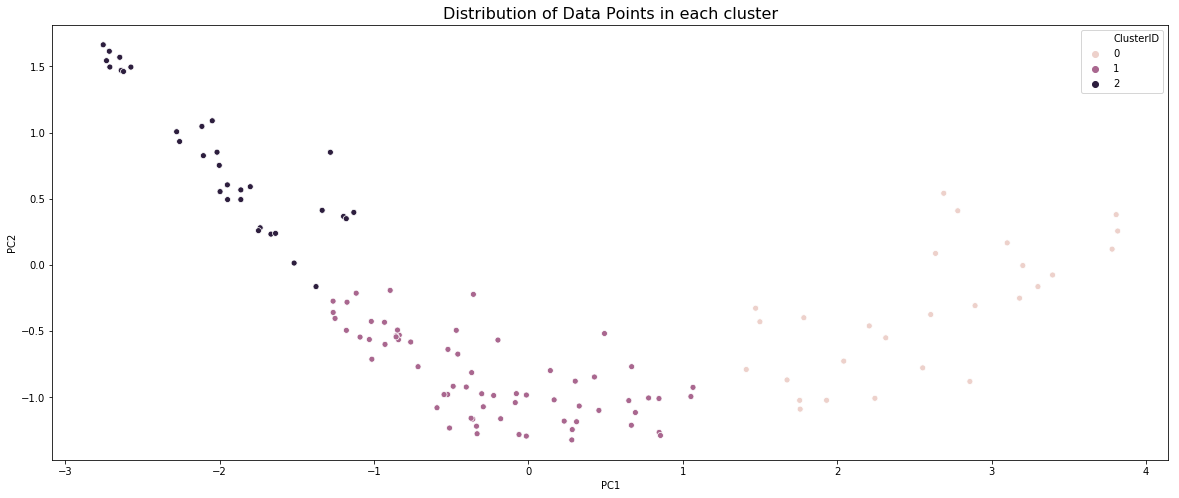

In [178]:
#Lets now see distribution of countries in each cluster
plt.figure(figsize=(20,8))
sns.scatterplot(x='PC1', y ='PC2', hue= 'ClusterID', data=df_kmeans)
plt.title("Distribution of Data Points in each cluster", fontsize=16)
plt.show()

In [ ]:
#Insights - Here I see a nice cluster formation.

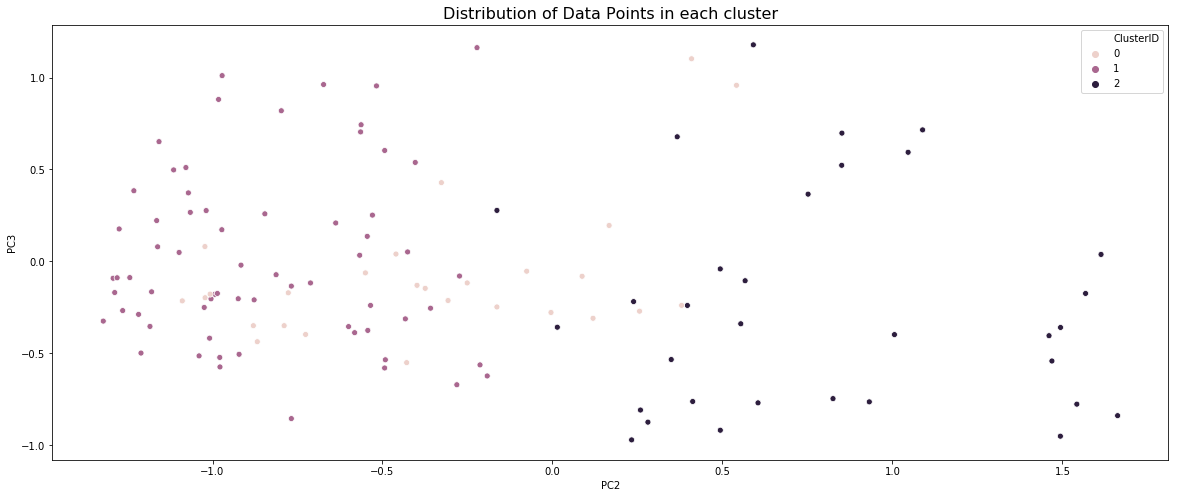

In [177]:
#Similarly, lets see distribution of Data points along with PC2 and PC3.
plt.figure(figsize=(20,8))
sns.scatterplot(x='PC2', y ='PC3', hue= 'ClusterID', data=df_kmeans)
plt.title("Distribution of Data Points in each cluster", fontsize=16)
plt.show()

In [ ]:
#I see a little overlapping between clusters. It might be because of few outliers in PC3

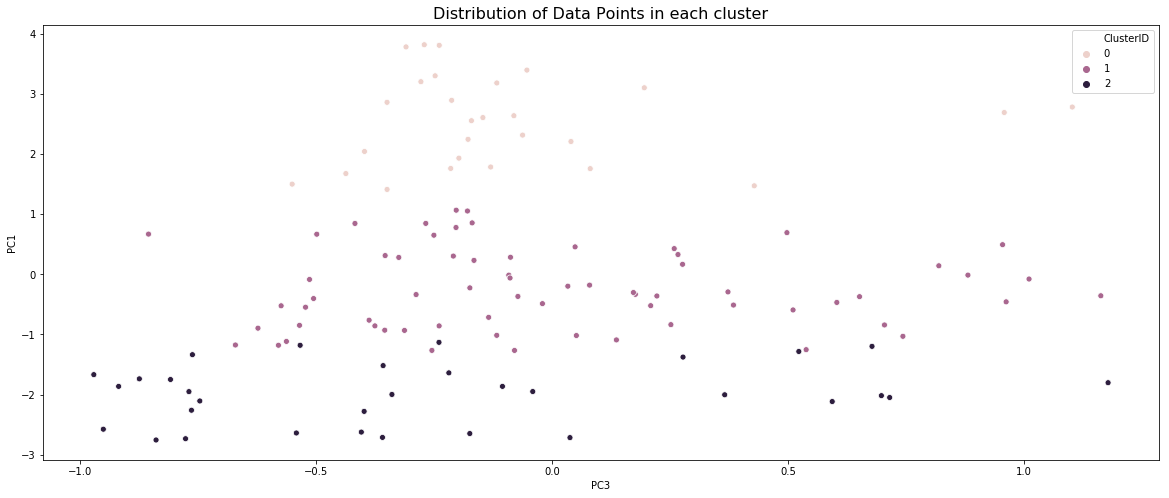

In [181]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='PC3', y ='PC1', hue= 'ClusterID', data=df_kmeans)
plt.title("Distribution of Data Points in each cluster", fontsize=16)
plt.show()

In [ ]:
#I see a little overlapping between clusters. It might be because of few outliers in PC3

In [182]:
#lets now join these cluster IDs back to original dataset
orig_df = pd.merge(left=country_df, right=df_kmeans, on='country', how='inner')
orig_df.shape

(125, 14)

In [183]:
orig_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.637442,1.469038,-0.541359,2
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649849,-1.024374,-0.250103,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,-0.332692,-1.274517,0.176636,1
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3.180362,-0.250785,-0.116877,0


In [184]:
missing_data(orig_df) #Lets see if there is any missing value introduced in our dataset

,Total,Percent
ClusterID,0,0.0
PC3,0,0.0
PC2,0,0.0
PC1,0,0.0
gdpp,0,0.0
total_fer,0,0.0
life_expec,0,0.0
inflation,0,0.0
income,0,0.0
imports,0,0.0


I see no missing values being introduced in dataset.

# Mean Analysis of Clusters

In [243]:
#Mean Analysis of above dataset
orig_df_mean =pd.DataFrame(orig_df.groupby('ClusterID').mean())
orig_df_mean.drop(['PC1', 'PC2','PC3'], axis=1, inplace=True)
orig_df_mean.rename(columns=lambda x: "mean_"+str(x), inplace=True) #Changing Column Names
orig_df_mean

,mean_child_mort,mean_exports,mean_health,mean_imports,mean_income,mean_inflation,mean_life_expec,mean_total_fer,mean_gdpp
ClusterID,,,,,,,,,
0,5.322222,14504.025926,3249.133704,13650.455556,37170.370370,2.204556,79.777778,1.749259,34696.296296
1,23.513636,2723.051311,377.012742,2889.606714,11433.787879,6.435167,72.404545,2.339545,5984.000000
2,73.984375,706.495213,114.613575,721.808406,3860.250000,10.133437,61.125000,4.650937,1797.562500


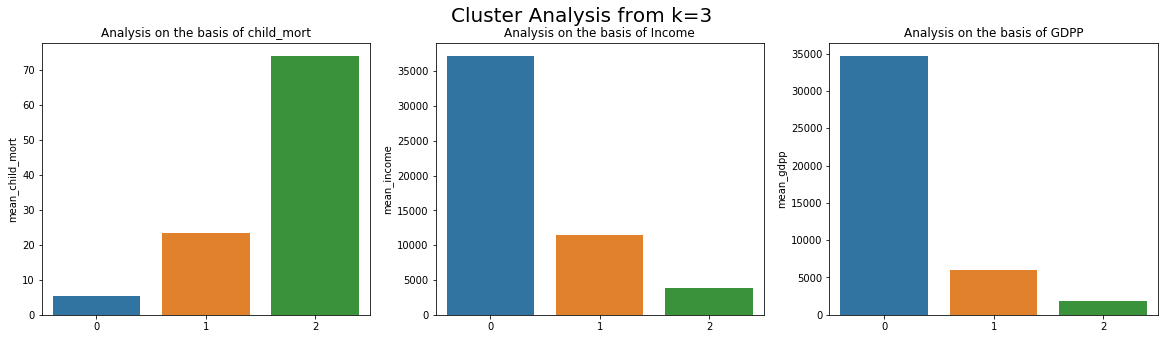

In [377]:
plt.figure(figsize=(20,5))
plt.suptitle("Cluster Analysis from k=3", fontsize=20)
plt.subplot(131)
sns.barplot(x=orig_df_mean.index.values, y=orig_df_mean['mean_child_mort'])
plt.title("Analysis on the basis of child_mort")
plt.subplot(132)
sns.barplot(x=orig_df_mean.index.values, y=orig_df_mean['mean_income'])
plt.title("Analysis on the basis of Income")
plt.subplot(133)
sns.barplot(x=orig_df_mean.index.values, y=orig_df_mean['mean_gdpp'])
plt.title("Analysis on the basis of GDPP")
plt.show()

I see that there is a huge gap between average values of cluster 0, cluster 1 and cluster2. 
But, from Business point of view, we are looking for top countries which are in direst need of help and if we go ahead with these clusters, we will end up helping even those all countries for whom help is not that crucial comparatively to another countries.

So, lets try to create 5 clusters because as per elbow curve that is second most optimal point.

In [189]:
df_kmeans_v2 = df_kmeans.copy()
df_kmeans_v2.drop('ClusterID', axis=1, inplace=True)  #Dropping ClusterID which was created using k=3

In [190]:
#Lets see now, if we had kept K=5
kmeans_v2 = KMeans(n_clusters=5, init= 'k-means++', max_iter=300, random_state=42)
kmeans_v2.fit(X)
kmeans_v2.labels_
df_kmeans_v2['ClusterID'] = kmeans_v2.labels_
df_kmeans_v2.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,4
2,Algeria,-0.457626,-0.673301,0.961867,0
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103,3
6,Armenia,-0.332692,-1.274517,0.176636,0
7,Australia,3.180362,-0.250785,-0.116877,1


In [192]:
#Now lets check count of records assigned to each cluster
df_kmeans_v2['ClusterID'].value_counts()

0    40
2    27
4    22
3    19
1    17
Name: ClusterID, dtype: int64

In [ ]:
#I see that atleast 5% of dataset records are assigned to each cluster. So, I am good to go.

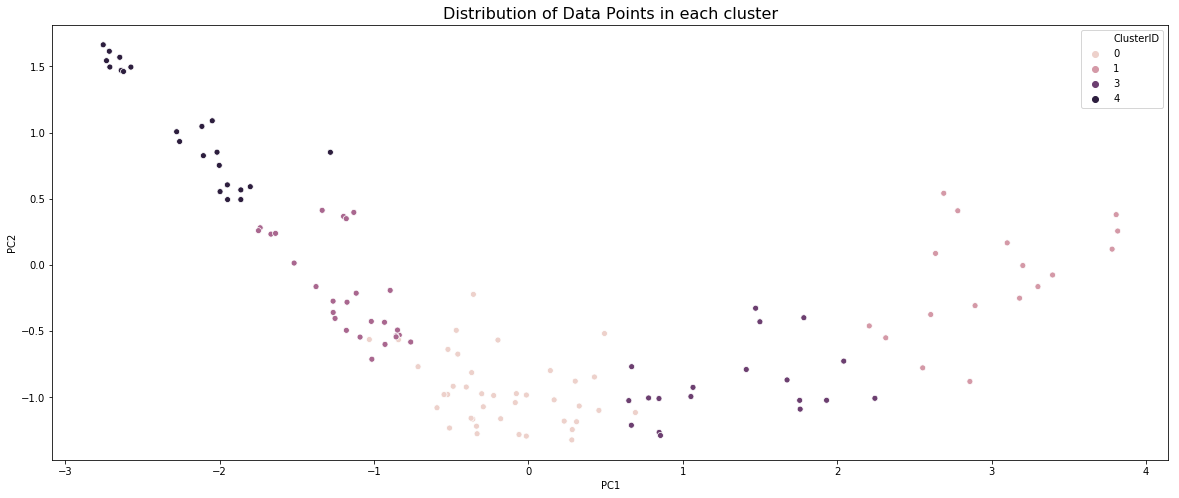

In [196]:
#Lets now see distribution of countries in each cluster
plt.figure(figsize=(20,8))
sns.scatterplot(x='PC1', y ='PC2', hue= 'ClusterID', data=df_kmeans_v2)
plt.title("Distribution of Data Points in each cluster", fontsize=16)
plt.show()

In [201]:
orig_df_v2 = pd.merge(left=country_df, right=df_kmeans_v2, on='country', how='inner')
orig_df_v2.shape  #Lets combine original df and this new df with all PCs

(125, 14)

# Mean Analysis of Clusters:
Lets now do Mean Analysis of our created clustered dataframe - orig_df_v2

In [244]:
orig_df_v2_mean =pd.DataFrame(orig_df_v2.groupby('ClusterID').mean())
orig_df_v2_mean.drop(['PC1', 'PC2','PC3'], axis=1, inplace=True)
orig_df_v2_mean.rename(columns=lambda x: "mean_"+str(x), inplace=True)
orig_df_v2_mean

,mean_child_mort,mean_exports,mean_health,mean_imports,mean_income,mean_inflation,mean_life_expec,mean_total_fer,mean_gdpp
ClusterID,,,,,,,,,
0,20.282500,2430.969250,373.527875,2490.087250,12207.000000,7.883525,73.630000,2.183000,5999.750000
1,5.141176,16736.111765,3954.500588,15324.935294,41705.882353,2.823647,80.476471,1.776471,40911.764706
2,44.918519,944.000279,167.513811,1234.890485,5375.555556,6.439630,65.837037,3.313704,2531.925926
3,6.900000,9200.489474,1489.787895,9445.805263,25036.842105,0.904789,76.957895,1.678947,18810.526316
4,82.750000,540.361627,58.209886,428.839955,2892.636364,11.550455,60.709091,5.071818,1273.363636


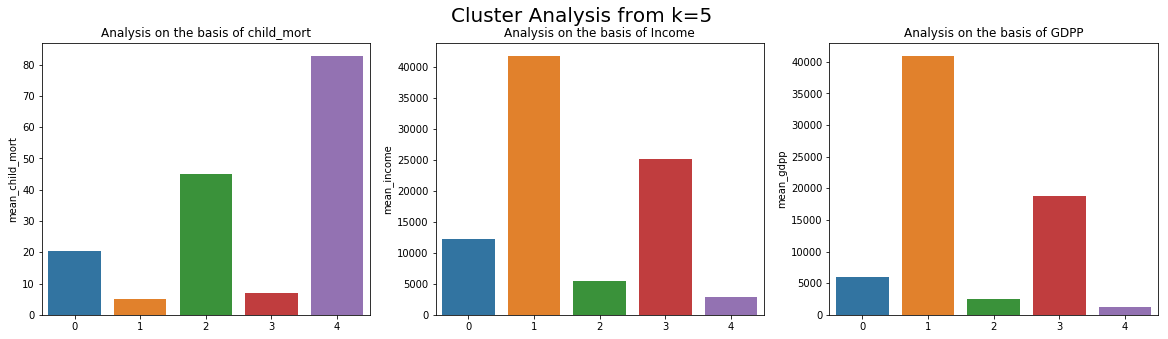

In [376]:
plt.figure(figsize=(20,5))
plt.suptitle("Cluster Analysis from k=5", fontsize=20)
plt.subplot(131)
sns.barplot(x=orig_df_v2_mean.index.values, y=orig_df_v2_mean['mean_child_mort'])
plt.title("Analysis on the basis of child_mort")
plt.subplot(132)
sns.barplot(x=orig_df_v2_mean.index.values, y=orig_df_v2_mean['mean_income'])
plt.title("Analysis on the basis of Income")
plt.subplot(133)
sns.barplot(x=orig_df_v2_mean.index.values, y=orig_df_v2_mean['mean_gdpp'])
plt.title("Analysis on the basis of GDPP")
plt.show()

Insights - I see that data is distributed nicely in each cluster as I don't see huge gap between the mean values of cluster. 
So, k=5 clusters looks like a good solution.

Also, it is clear that cluster 4 is in dire need of help as for Cluster 4, we have most child_mort and minimum income and minimum gdpp.

In [ ]:
#lets now also analyse with hierarchical clustering and see if we get the same results

# Hierarchical Clustering

In [283]:
df_hierarchical = df_kmeans[['country', 'PC1', 'PC2', 'PC3']] #Create a df using previous dataframe and remove clusterID column

In [284]:
X_df_for_hierar = df_hierarchical[['PC1','PC2','PC3']] # Lets first create X from df_hierarchical

In [285]:
df_hierarchical.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
2,Algeria,-0.457626,-0.673301,0.961867
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103
6,Armenia,-0.332692,-1.274517,0.176636
7,Australia,3.180362,-0.250785,-0.116877


In [286]:
X_df_for_hierar.shape

(125, 3)

Hierarchical Clustering using Single Linkage

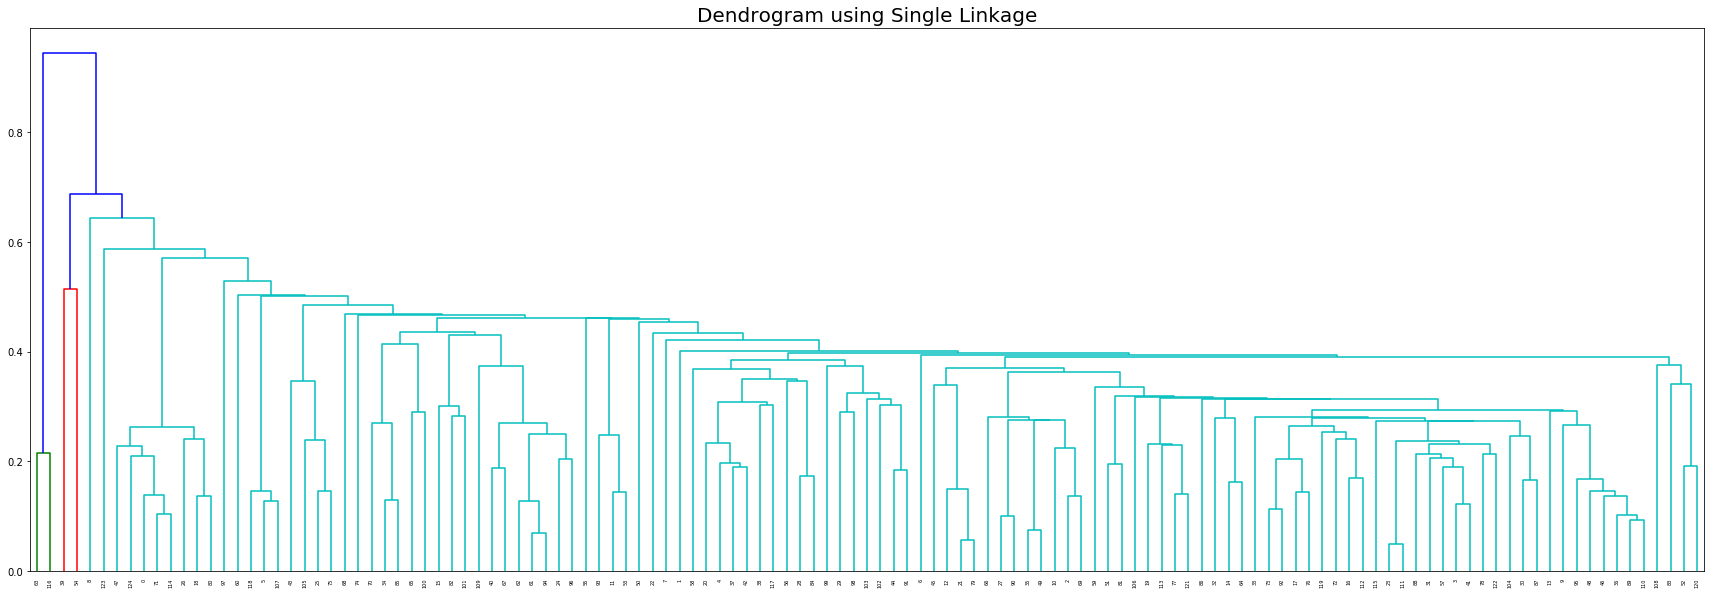

In [287]:
plt.figure(figsize=(30,10))
mergings = linkage(X_df_for_hierar, method='single', metric='euclidean')
dendrogram(mergings)
plt.title("Dendrogram using Single Linkage", fontsize=20)
plt.show()

In [ ]:
#Insights - I don't see much distance between datapoints from above plot. Lets try out complete linkage.

Hierarchical Clustering using Complete Linkage

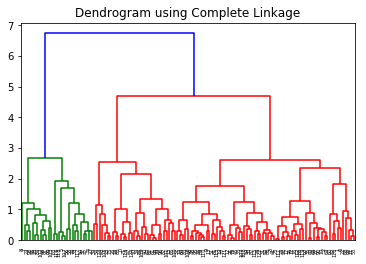

In [288]:
mergings = linkage(X_df_for_hierar, method='complete', metric='euclidean')
dendrogram(mergings)
plt.title("Dendrogram using Complete Linkage")
plt.show()

In above plot, If I draw a line point y=4, I see that k=3 will be an optimal result as we have justofied distance between the data points.

In [289]:
#lets choose k=3 here.
#I tried choosing k= 4 and k=5. But in that case, we end up getting 2 records in 1 cluster which looks like a weak approach
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1,
       1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0,
       2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 1, 0,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0])

In [290]:
df_hierarchical['ClusterID'] = cluster_labels
df_hierarchical.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,0
2,Algeria,-0.457626,-0.673301,0.961867,1
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103,1
6,Armenia,-0.332692,-1.274517,0.176636,1
7,Australia,3.180362,-0.250785,-0.116877,2


In [279]:
df_hierarchical.shape

(125, 5)

In [291]:
#lets again check for missing values in our dataset after introducing ClsuterID
missing_data(df_hierarchical)

,Total,Percent
ClusterID,0,0.0
PC3,0,0.0
PC2,0,0.0
PC1,0,0.0
country,0,0.0


In [ ]:
#Insights - I dont see any missing values in dataset. That means for each record, clusterID has been assigned.

In [292]:
#Lets now count number of datapoints in each cluster.
df_hierarchical['ClusterID'].value_counts()

1    67
0    31
2    27
Name: ClusterID, dtype: int64

In [ ]:
#I see that there are atleast 5% of datapoints in each cluster. That means our clusters are good.

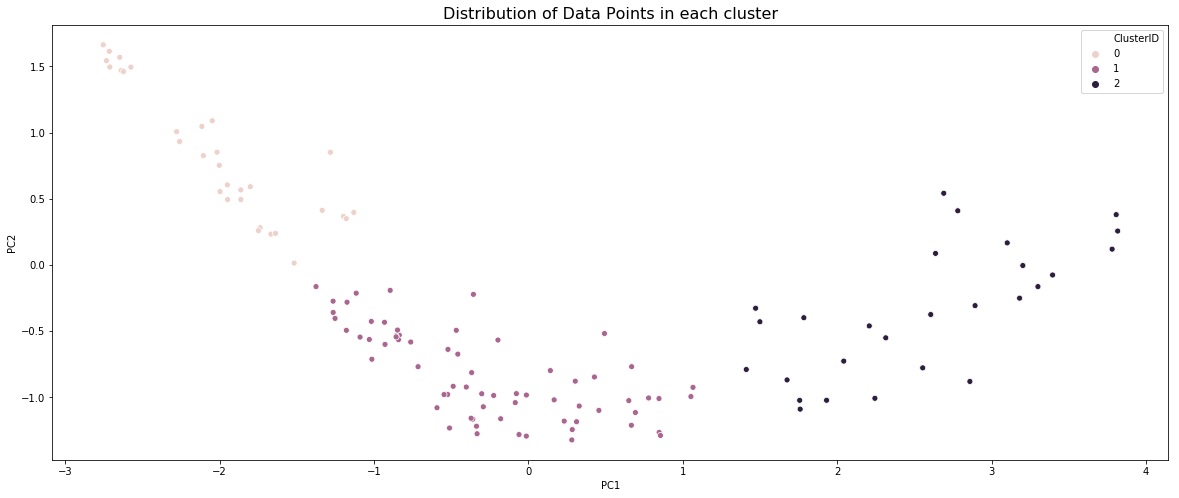

In [293]:
#Lets now see distribution of countries in each cluster
plt.figure(figsize=(20,8))
sns.scatterplot(x='PC1', y ='PC2', hue= 'ClusterID', data=df_hierarchical)
plt.title("Distribution of Data Points in each cluster", fontsize=16)
plt.show()

Insights - I see that datapoints are nicely making a cluster.

In [294]:
#Combine with original dataset
orig_df_hierar = pd.merge(left=country_df, right=df_hierarchical, on='country', how='inner')
orig_df_hierar.shape

(125, 14)

# Mean Analysis of Clusters

In [295]:
orig_df_hierar_mean =pd.DataFrame(orig_df_hierar.groupby('ClusterID').mean())
orig_df_hierar_mean.drop(['PC1', 'PC2','PC3'], axis=1, inplace=True)
orig_df_hierar_mean.rename(columns=lambda x: "mean_"+str(x), inplace=True)
orig_df_hierar_mean

,mean_child_mort,mean_exports,mean_health,mean_imports,mean_income,mean_inflation,mean_life_expec,mean_total_fer,mean_gdpp
ClusterID,,,,,,,,,
0,74.680645,725.738219,116.887161,731.141968,3916.709677,10.057097,60.851613,4.687742,1831.741935
1,23.944776,2684.049978,372.044379,2852.933001,11294.626866,6.525687,72.362687,2.357015,5905.701493
2,5.322222,14504.025926,3249.133704,13650.455556,37170.370370,2.204556,79.777778,1.749259,34696.296296


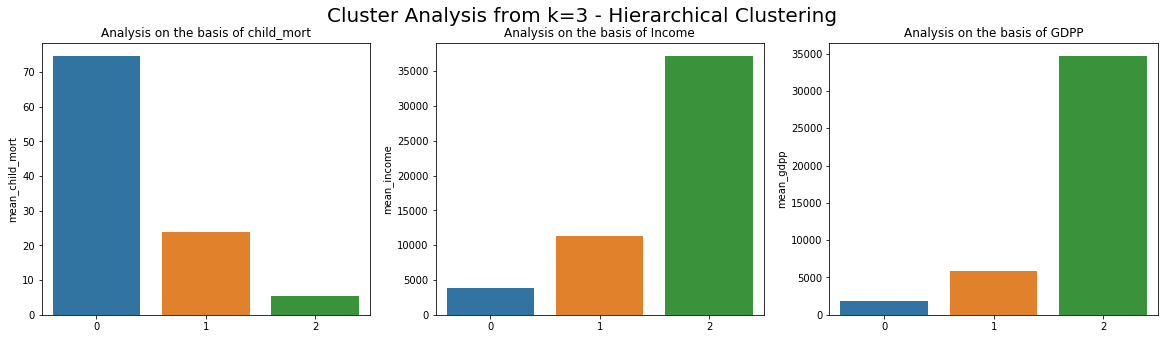

In [357]:
plt.figure(figsize=(20,5))
plt.suptitle("Cluster Analysis from k=3 - Hierarchical Clustering", fontsize=20)
plt.subplot(131)
sns.barplot(x=orig_df_hierar_mean.index.values, y=orig_df_hierar_mean['mean_child_mort'])
plt.title("Analysis on the basis of child_mort")
plt.subplot(132)
sns.barplot(x=orig_df_hierar_mean.index.values, y=orig_df_hierar_mean['mean_income'])
plt.title("Analysis on the basis of Income")
plt.subplot(133)
sns.barplot(x=orig_df_hierar_mean.index.values, y=orig_df_hierar_mean['mean_gdpp'])
plt.title("Analysis on the basis of GDPP")
plt.show()

In [296]:
#Here I see that cluster number 0 is in dire need of help. 
#I see that from KMeans, we got cluster =4 having countries with dire need of help and from hierarchical clustering, we got cluster=0 has countries in need of help.
#I see that from hierarchical clustering, we got 31 countries and from Kmeans, we got 22 countries. I also found that these 22 countries are top 22 countries for help from 31 countries from hierarchical
#So, we will go ahead with the dataframe which was created from KMeans with k=5

# Cluster Analysis for Outliered Countries

In [297]:
#lets now see those countries which we dropped and try to fit in to existing clusters on the basis of child_mort, income and gdpp
dropped_df = country_df[~country_df['country'].isin(orig_df_v2['country'])]

In [298]:
dropped_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,Albania,16.6,1145.2000,267.8950,1987.740,9930,4.490,76.3,1.65,4090
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530
5,Argentina,14.5,1946.7000,834.3000,1648.000,18700,20.900,75.8,2.37,10300
15,Belgium,4.5,33921.6000,4750.8000,33166.800,41100,1.880,80.0,1.86,44400
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
20,Bosnia and Herzegovina,6.9,1369.1700,511.7100,2364.930,9720,1.400,76.8,1.31,4610
23,Brunei,10.5,23792.2000,1002.5200,9884.000,80600,16.700,77.1,1.84,35300
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446


In [ ]:
#Lets describe our dataframe based on ClusterID

In [302]:
pd.set_option('display.max_columns',500)
orig_df_v2[['child_mort','gdpp','income','ClusterID','PC1','PC2']].groupby('ClusterID').describe()


child_mort                                                          \
               count       mean        std   min     25%    50%   75%    max   
ClusterID                                                                      
0               40.0  20.282500   8.672115   5.5  14.900  19.15  24.1   42.7   
1               17.0   5.141176   2.213611   2.6   3.600   4.30   6.2   10.8   
2               27.0  44.918519  15.942252  17.4  30.750  46.60  57.4   78.9   
3               19.0   6.900000   3.719916   3.2   4.000   6.00   8.2   14.4   
4               22.0  82.750000  17.590331  55.2  68.075  82.05  91.7  116.0   

           gdpp                                                         \
          count          mean          std      min       25%      50%   
ClusterID                                                                
0          40.0   5999.750000  3189.828777   1310.0   3227.50   5645.0   
1          17.0  40911.764706  8063.643900  21100.0  35800.00  41800.0   
2          27.0   2531.925926  1824.251689    563.0    977.50   2130.0   
3          19.0  18810.526316  6752.933086  10800.0  12850.00  16600.0   
4          22.0   1273.363636  1757.551423    327.0    555.25    735.5   

                            income                                       \
               75%      max  count          mean           std      min   
ClusterID                                                                 
0           8117.5  12900.0   40.0  12207.000000   5811.881817   3910.0   
1          46900.0  52100.0   17.0  41705.882353  10897.102286  28300.0   
2           3500.0   7280.0   27.0   5375.555556   3556.829112   1350.0   
3          22950.0  30700.0   19.0  25036.842105   6102.386648  15300.0   
4           1287.5   8750.0   22.0   2892.636364   3061.059038    700.0   

                                                PC1                      \
               25%      50%      75%      max count      mean       std   
ClusterID                                                                 
0           7690.0  10700.0  16050.0  29600.0  40.0 -0.163996  0.399753   
1          36200.0  39800.0  42900.0  75200.0  17.0  3.006617  0.500906   
2           2500.0   4410.0   7030.0  13300.0  27.0 -1.178643  0.288379   
3          20750.0  22900.0  28700.0  41100.0  19.0  1.315573  0.523375   
4           1412.5   1875.0   3310.0  15400.0  22.0 -2.223788  0.398188   

                                                              PC2            \
                min       25%       50%       75%       max count      mean   
ClusterID                                                                     
0         -1.030563 -0.460098 -0.258915  0.182563  0.692394  40.0 -0.955995   
1          2.207085  2.636077  2.892154  3.299309  3.815682  17.0 -0.110848   
2         -1.748411 -1.300625 -1.175019 -0.930643 -0.762616  27.0 -0.193537   
3          0.649849  0.845758  1.410445  1.757942  2.243482  19.0 -0.903343   
4         -2.753874 -2.633706 -2.110065 -1.961733 -1.282802  22.0  1.043588   

                                                                       
                std       min       25%       50%       75%       max  
ClusterID                                                              
0          0.262837 -1.321289 -1.162117 -0.983937 -0.809153 -0.221990  
1          0.413332 -0.879853 -0.374392 -0.075886  0.166621  0.541214  
2          0.372234 -0.711808 -0.511648 -0.281317  0.235657  0.412453  
3          0.275516 -1.287650 -1.023336 -1.004397 -0.778721 -0.326796  
4          0.418915  0.493518  0.641415  0.968930  1.487713  1.662328

In [303]:
#Lets first assign the cluster on the basis of child_mort and then we will verify other column values
#I see that on the basis of minimum values of child_mort, clusters are assigned as below.
def assign_cluster(val):
    if(val >= 55.2):
        return 4
    elif(val>=17.4):
        return 2
    elif(val>=5.5):
        return 0
    elif(val>=3.2):
        return 3
    elif(val>=2.6):
        return 1

#For verification purpose - Lets define the condition of cluster that should be assigned on the basis of income.
1. if income >= 28300: then cluster 1
2. if income >= 15300: then cluster 3
3. if income >= 3910: then cluster 0
4. if income >= 1350; then cluster 2
5. if income >=700, then cluster 4

In [304]:
#Lets now assign clusters to Outliered records on the basis of below logic:
dropped_df['ClusterID'] = dropped_df['child_mort'].apply(lambda x: assign_cluster(x))
dropped_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,16.6,1145.2000,267.8950,1987.740,9930,4.490,76.3,1.65,4090,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,4
5,Argentina,14.5,1946.7000,834.3000,1648.000,18700,20.900,75.8,2.37,10300,0
15,Belgium,4.5,33921.6000,4750.8000,33166.800,41100,1.880,80.0,1.86,44400,3
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,4
20,Bosnia and Herzegovina,6.9,1369.1700,511.7100,2364.930,9720,1.400,76.8,1.31,4610,0
23,Brunei,10.5,23792.2000,1002.5200,9884.000,80600,16.700,77.1,1.84,35300,0
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,4
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,4
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,4


In [306]:
#Insights - I have manually verified cluster assignment if above dataframe on the basis of income. So, we are good with our cluster assignment.

In [ ]:
#Now lets concat dropped_df and orig_df_v2 dataframe and create a final_result df.

In [307]:
result_df = pd.concat([orig_df_v2, dropped_df])

In [308]:
result_df.shape

(167, 14)

In [309]:
result_df.drop(['PC1', 'PC2','PC3'], axis=1, inplace=True)
#lets consider records of cluster 4 as we had found that countries of cluster4 are in most need of help.
result_df[result_df['ClusterID']==4]

,ClusterID,child_mort,country,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
0,4,90.2,Afghanistan,55.3000,553,41.9174,248.297,1610,9.440,56.2,5.82
18,4,116.0,Burkina Faso,110.4000,575,38.7550,170.200,1430,6.810,57.9,5.87
24,4,88.2,Comoros,126.8850,769,34.6819,397.573,1410,3.870,65.9,4.75
25,4,63.9,"Congo, Rep.",2331.7400,2740,67.4040,1498.780,5190,20.700,60.4,4.95
26,4,111.0,Cote d'Ivoire,617.3200,1220,64.6600,528.260,2690,5.390,56.3,5.27
34,4,55.2,Eritrea,23.0878,482,12.8212,112.306,1420,11.600,61.7,4.61
39,4,63.7,Gabon,5048.7500,8750,306.2500,1653.750,15400,16.600,62.9,4.08
40,4,80.3,Gambia,133.7560,562,31.9778,239.974,1660,4.300,65.5,5.71
43,4,74.7,Ghana,386.4500,1310,68.3820,601.290,3060,16.600,62.2,4.27
47,4,109.0,Guinea,196.3440,648,31.9464,279.936,1190,16.100,58.0,5.34


# Analysing Countries which are in dire need of help

In [321]:
#Lets focus on those countries whose child_mort is even greater than 50% of child_mort in cluster4
#Income is even lesser than 50% of income in cluster 4
#and gdpp is also lesser than 50% of gdpp in cluster4 

#Lets first calculate mean value for each column - child_mort, GDPP, income
#Note: I am considering only these 3 columns as during EDA, I had found that other columns have strong relation with these 3 columns

child_mort_mean = result_df[result_df['ClusterID']==4]['child_mort'].quantile(0.50)
income_mean = result_df[result_df['ClusterID']==4]['income'].quantile(0.50) 
gdpp_mean = result_df[result_df['ClusterID']==2]['gdpp'].quantile(0.50)

In [367]:
print("Mean value of Child_mort in Cluster4: ", child_mort_mean)
print("Mean value of income in Cluster4: ", income_mean)
print("Mean value of GDPP in Cluster4: ", gdpp_mean)

Mean value of Child_mort in Cluster4:  93.6
Mean value of income in Cluster4:  1820.0
Mean value of GDPP in Cluster4:  2365.0


Now, I need to consider only those countries where:
1. Child_mort rate is > child_mort_mean(93.6) and
2. Income < income_mean (1820)
3. or GDPP < gdpp_mean (2365)

Here I have applied ‘or’ condition between income and GDPP because after taking a close look at data set, I found that there are countries where Income is little more than mean but GDPP is very less.
As countries health can be determined by GDPP, I have taken all such countries into account.

In [378]:
df_to_represent = result_df[(result_df['ClusterID']==4) & (result_df['child_mort']>child_mort_mean) & ((result_df['income']<income_mean) | (result_df['gdpp']<gdpp_mean))]
df_to_represent

,ClusterID,child_mort,country,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
18,4,116.0,Burkina Faso,110.400,575,38.7550,170.200,1430,6.810,57.9,5.87
26,4,111.0,Cote d'Ivoire,617.320,1220,64.6600,528.260,2690,5.390,56.3,5.27
47,4,109.0,Guinea,196.344,648,31.9464,279.936,1190,16.100,58.0,5.34
75,4,97.4,Mauritania,608.400,1200,52.9200,734.400,3320,18.900,68.2,4.98
80,4,101.0,Mozambique,131.985,419,21.8299,193.578,918,7.640,54.5,5.56
17,4,111.0,Benin,180.404,758,31.0780,281.976,1820,0.885,61.8,5.36
28,4,108.0,Cameroon,290.820,1310,67.2030,353.700,2660,1.910,57.3,5.11
31,4,149.0,Central African Republic,52.628,446,17.7508,118.190,888,2.010,47.5,5.21
32,4,150.0,Chad,330.096,897,40.6341,390.195,1930,6.390,56.5,6.59
37,4,116.0,"Congo, Dem. Rep.",137.274,334,26.4194,165.664,609,20.800,57.5,6.54


In [ ]:
#Lets now cross - verify if with above conditions, there is any record present in any other cluster

In [379]:
#Check in Cluster1
result_df[(result_df['ClusterID']==1) & (result_df['child_mort']>child_mort_mean) & ((result_df['income']<income_mean) | (result_df['gdpp']<gdpp_mean))]

,ClusterID,child_mort,country,exports,gdpp,health,imports,income,inflation,life_expec,total_fer


In [380]:
#Check in Cluster3
result_df[(result_df['ClusterID']==3) & (result_df['child_mort']>child_mort_mean) & ((result_df['income']<income_mean) | (result_df['gdpp']<gdpp_mean))]

,ClusterID,child_mort,country,exports,gdpp,health,imports,income,inflation,life_expec,total_fer


In [381]:
#Check in cluster2
result_df[(result_df['ClusterID']==2) & (result_df['child_mort']>child_mort_mean) & ((result_df['income']<income_mean) | (result_df['gdpp']<gdpp_mean))]

,ClusterID,child_mort,country,exports,gdpp,health,imports,income,inflation,life_expec,total_fer


In [382]:
#Check in cluster0
result_df[(result_df['ClusterID']==0) & (result_df['child_mort']>child_mort_mean) & ((result_df['income']<income_mean) | (result_df['gdpp']<gdpp_mean))]

,ClusterID,child_mort,country,exports,gdpp,health,imports,income,inflation,life_expec,total_fer


Insights - 
I see that with my conditions, there is no country present in any of the cluster which means we are at the track to finding our countries which need help
.


In [384]:
countries_to_report = df_to_represent[['country','child_mort','income','gdpp']].sort_values(by=['child_mort', 'gdpp'], ascending=[False,True])
countries_to_report = countries_to_report.set_index(np.arange(1,18),drop=True)
countries_to_report.drop(['child_mort','income','gdpp'], axis=1, inplace=True)
countries_to_report

,country
1,Haiti
2,Sierra Leone
3,Chad
4,Central African Republic
5,Mali
6,Nigeria
7,Niger
8,"Congo, Dem. Rep."
9,Burkina Faso
10,Guinea-Bissau


# Conclusion: Top 10 Countries which are in direst need of help

As we have a limited budget, so want to know Top 10 countries first which needs help urgently.

To find the same, I have sorted the list of countries on the basis of Child_mort in Descending order and GDPP in Ascending order, I could find TOP 10 countries which are in urgent need of help.


1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali
6. Nigeria
7. Niger
8. Congo, Dem. Rep.
9. Burkina Faso
10. Guinea-Bissau

If HELP NGO wants to invest $10 Million, that should be invested in above listed countries as they are in direst need of help.